In [1]:
import torch
import numpy as np

In [2]:
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F

In [3]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print(device) # 내 노트북으로 해서 cpu로 나올 예정

cpu


In [4]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
%matplotlib inline

In [5]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, roc_auc_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report

In [6]:
class Visualization:
    labels = ["Normal", "Anomaly"]

    def draw_confusion_matrix(self, y, ypred):
        matrix = confusion_matrix(y, ypred)

        plt.figure(figsize=(10, 8))
        colors=[ "orange","green"]
        sns.heatmap(matrix, xticklabels=self.labels, yticklabels=self.labels, cmap=colors, annot=True, fmt="d")
        plt.title("Confusion Matrix")
        plt.ylabel('Actual')
        plt.xlabel('Predicted')
        plt.show()


    def draw_anomaly(self, y, error, threshold):
        groupsDF = pd.DataFrame({'error': error,
                                 'true': y}).groupby('true')

        figure, axes = plt.subplots(figsize=(12, 8))

        for name, group in groupsDF:
            axes.plot(group.index, group.error, marker='x' if name == 1 else 'o', linestyle='',
                    color='r' if name == 1 else 'g', label="Anomaly" if name == 1 else "Normal")

        axes.hlines(threshold, axes.get_xlim()[0], axes.get_xlim()[1], colors="b", zorder=100, label='Threshold')
        axes.legend()
        
        plt.title("Anomalies")
        plt.ylabel("Error")
        plt.xlabel("Data")
        plt.show()

    def draw_error(self, error, threshold):
            plt.plot(error, marker='o', ms=3.5, linestyle='',
                     label='Point')

            plt.hlines(threshold, xmin=0, xmax=len(error)-1, colors="b", zorder=100, label='Threshold')
            plt.legend()
            plt.title("Reconstruction error")
            plt.ylabel("Error")
            plt.xlabel("Data")
            plt.show()

In [7]:
viz = Visualization()
# 시각화 객체 정의

In [8]:
df = pd.read_csv('data/creditcard.csv', header = 0, sep = ',')
print(df.shape)
df.head()

(284807, 31)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [9]:
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [10]:
df['Amount'] = StandardScaler().fit_transform(df['Amount'].values.reshape(-1, 1))
df0 = df.query('Class == 0').sample(20000)
df1 = df.query('Class == 1').sample(400)
df = pd.concat([df0, df1])

In [11]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
282029,170615.0,2.180062,-1.758267,0.011970,-1.566799,-1.956546,0.007536,-1.924152,0.177587,-0.721939,...,-0.110166,0.159253,0.288898,-0.378407,-0.557486,-0.245203,0.056660,-0.041411,-0.235286,0
257464,158179.0,-0.315626,1.184693,-1.498383,0.751626,1.655667,-0.619278,0.955823,0.145659,-0.999862,...,0.295636,0.841605,-0.089557,0.049713,-0.627820,-0.505724,0.410914,0.213018,-0.319805,0
182611,125475.0,2.222383,-1.748274,-0.085812,-1.693127,-1.624895,0.516287,-2.011178,0.124158,-0.561341,...,0.044058,0.644285,0.177195,0.055449,-0.386843,-0.088135,0.077024,-0.018409,-0.173355,0
13489,23882.0,1.318462,0.078992,-0.947784,-0.353514,2.104428,3.315163,-0.627754,0.727705,1.232235,...,-0.463810,-1.255173,0.115566,0.931099,0.346279,0.071775,-0.055035,0.005423,-0.345313,0
58284,48320.0,1.319199,0.234119,-0.143166,0.470983,0.014669,-0.522591,-0.006241,-0.076324,0.271622,...,-0.364497,-1.109514,0.015176,-0.693635,0.310959,0.160217,-0.032457,0.018840,-0.331280,0


In [12]:
x_train, x_test, y_train, y_test = train_test_split(df.drop(labels=['Time', 'Class'], axis = 1) , 
                                                    df['Class'], test_size=0.2, random_state=42)
print(x_train.shape, 'train samples')
print(x_test.shape, 'test samples')

(16320, 29) train samples
(4080, 29) test samples


In [13]:
torch.manual_seed(42)
# 랜덤 시드 고정

In [14]:
x_train_tensor = torch.tensor(np.array(x_train), dtype = torch.float32)
x_train_tensor

tensor([[-0.4650,  0.7092,  1.5361,  ...,  0.0108,  0.2231, -0.3492],
        [ 1.2151, -0.1479,  0.6181,  ..., -0.0710,  0.0033, -0.2757],
        [ 2.0994, -1.1087,  0.3997,  ...,  0.0603, -0.0177, -0.3133],
        ...,
        [ 2.0178,  0.0383, -1.6252,  ..., -0.0730, -0.0409, -0.3453],
        [-1.2167,  0.9454,  1.7687,  ...,  0.0567,  0.0505, -0.2335],
        [ 1.1174,  0.2381,  0.6585,  ...,  0.0318,  0.0294, -0.2733]])

In [15]:
x_test_tensor = torch.tensor(np.array(x_test), dtype = torch.float32)
x_test_tensor

tensor([[ 1.3046e+00,  1.2245e-01,  1.3038e-01,  ..., -3.8959e-02,
          9.3280e-03, -3.1729e-01],
        [ 1.4591e+00, -6.5503e-01, -1.2339e+00,  ..., -5.6906e-02,
          3.2131e-03, -3.3728e-01],
        [ 1.2976e+00, -5.1859e-01,  2.9188e-01,  ...,  6.4184e-03,
          2.2121e-03, -2.4988e-01],
        ...,
        [-1.6117e+00, -1.9886e+00,  1.3824e+00,  ..., -6.4664e-02,
          6.9092e-02,  9.9674e-02],
        [-1.1457e+00,  1.6206e+00, -8.2476e-01,  ..., -9.4234e-01,
         -7.2757e-01, -3.4359e-01],
        [-1.9126e+00,  2.6807e+00,  2.2379e-01,  ...,  7.8552e-01,
         -2.1128e-02,  1.1643e+00]])

In [16]:
print(x_train_tensor.shape)
print(x_test_tensor.shape)

torch.Size([16320, 29])
torch.Size([4080, 29])


In [17]:
from torch.utils.data import DataLoader
from torch.utils.data import TensorDataset
train_tensor = TensorDataset(x_train_tensor, x_train_tensor)
test_tensor = TensorDataset(x_test_tensor, x_test_tensor)

In [18]:
batch_size = 32

In [19]:
train_dataloader = DataLoader(train_tensor, batch_size=batch_size)
test_dataloader = DataLoader(test_tensor, batch_size=batch_size)

In [20]:
def sampling(*args):
    z_mean, z_log_var = args
    batch = z_mean.shape[0]
    dim = z_mean.shape[1]
    
    epsilon = torch.randn((batch, dim))
    
    return z_mean + epsilon*torch.exp(0.5*z_log_var)

In [21]:
a = torch.randn((3, 4))
b = torch.randn((3, 4))
print(a, b)

tensor([[ 0.3367,  0.1288,  0.2345,  0.2303],
        [-1.1229, -0.1863,  2.2082, -0.6380],
        [ 0.4617,  0.2674,  0.5349,  0.8094]]) tensor([[ 1.1103, -1.6898, -0.9890,  0.9580],
        [ 1.3221,  0.8172, -0.7658, -0.7506],
        [ 1.3525,  0.6863, -0.3278,  0.7950]])


In [22]:
sampling(a, b)

tensor([[ 0.8272,  0.1529,  0.5533, -0.1545],
        [-1.2195,  0.6057,  2.2024, -0.1371],
        [ 0.7235,  1.4850, -0.3272, -0.5132]])

In [23]:
class VariationalAutoEncoder(nn.Module):
    def __init__(self):
        super(VariationalAutoEncoder, self).__init__()
        self.dense1 = nn.Linear(29, 12)
        self.latent = nn.Linear(12, 2)
        self.dense2 = nn.Linear(2, 12)
        self.dense3 = nn.Linear(12, 29)
        self.relu = nn.ReLU()
        self.sigmoid = nn.Sigmoid()
    def forward(self, x):
        x = self.dense1(x)
        x = self.relu(x)
        z_mean = self.latent(x)
        z_log_var = self.latent(x)
        x = sampling(z_mean, z_log_var)
        x = self.dense2(x)
        x = self.relu(x)
        x = self.dense3(x)
        x = self.sigmoid(x)
        
        return x, z_mean, z_log_var

In [24]:
model = VariationalAutoEncoder().to(device)
# 학습의 형태 적용. device 가 cuda 일경우 GPU 학습

In [25]:
reconstruction_function = nn.MSELoss()

In [26]:
def loss_fn(output, input, z_mean, z_log_var):
    BCE = reconstruction_function(output, input)
    KLD_element = z_mean.pow(2).add_(z_log_var.exp()).mul_(-1).add_(1).add_(z_log_var)
    KLD = torch.sum(KLD_element).mul_(-0.5)
    return BCE + KLD

In [27]:
optimizer = optim.Adam(model.parameters())

In [28]:
def train(dataloader, model, optimizer):
    size = len(dataloader.dataset)
    loss_sum = 0
    model.train()
    for batch, (X, y) in enumerate(dataloader):
        X, y = X.to(device), y.to(device)
        
        pred, z_mean, z_log_var = model(X)
        loss = loss_fn(pred, X, z_mean, z_log_var)
        loss_sum += loss
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    print(f'Avg loss: {loss_sum / size}')
    print('-------------------------------\n')
    return model

In [29]:
epochs = 20

In [30]:
for t in range(epochs):
    print(f"Epoch {t+1}\n")
    train(train_dataloader, model, optimizer)
print("Done!")

Epoch 1

Avg loss: 0.074897900223732
-------------------------------

Epoch 2

Avg loss: 0.05186602473258972
-------------------------------

Epoch 3

Avg loss: 0.049993112683296204
-------------------------------

Epoch 4

Avg loss: 0.04926803335547447
-------------------------------

Epoch 5

Avg loss: 0.04891568794846535
-------------------------------

Epoch 6

Avg loss: 0.048735931515693665
-------------------------------

Epoch 7

Avg loss: 0.048638809472322464
-------------------------------

Epoch 8

Avg loss: 0.048537760972976685
-------------------------------

Epoch 9

Avg loss: 0.04850488528609276
-------------------------------

Epoch 10

Avg loss: 0.04850875586271286
-------------------------------

Epoch 11

Avg loss: 0.04848870262503624
-------------------------------

Epoch 12

Avg loss: 0.048443760722875595
-------------------------------

Epoch 13

Avg loss: 0.048455335199832916
-------------------------------

Epoch 14

Avg loss: 0.04845928028225899
----------------

In [31]:
threshold = 10
y_pred = model(x_test_tensor)[0].detach().numpy()

In [32]:
y_dist = np.linalg.norm(x_test - y_pred, axis=-1)
z = zip(y_dist >= threshold, y_dist)
y_label = [] ; error = []

for idx, (is_anomaly, y_dist) in enumerate(z):
    if is_anomaly:
        y_label.append(1)
    else:
        y_label.append(0)
    error.append(y_dist)

In [33]:
print(classification_report(y_test, y_label))

              precision    recall  f1-score   support

           0       1.00      0.97      0.98      3987
           1       0.39      0.82      0.53        93

    accuracy                           0.97      4080
   macro avg       0.69      0.89      0.76      4080
weighted avg       0.98      0.97      0.97      4080



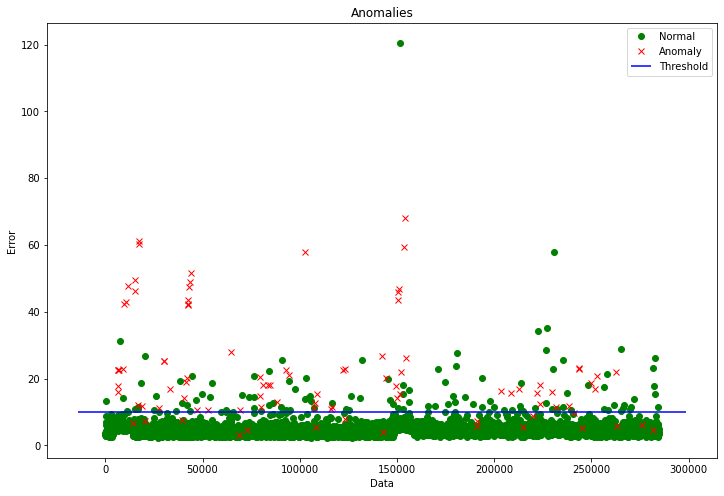

In [34]:
viz.draw_anomaly(y_test, error, threshold)